In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Machine Learning 100 days\Day_49_regression_metrices\placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

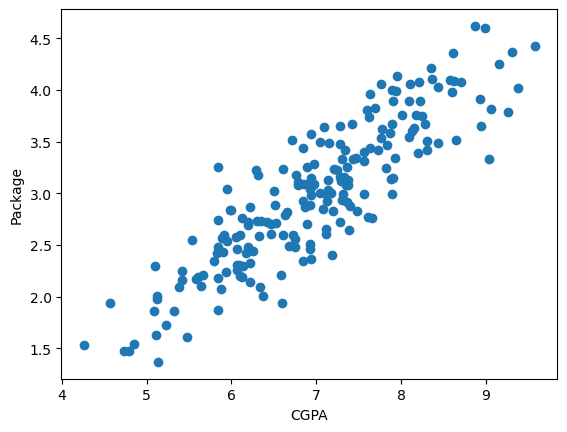

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [7]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,Y_train)  #trainig the model

LinearRegression()

In [12]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [13]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [14]:
#now chekc how correct answer it gives
lr.predict(X_test.iloc[0].values.reshape(1,1))  #original 112->8.58-4.10 and using this project 112->8.58-3.89

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [15]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Package')

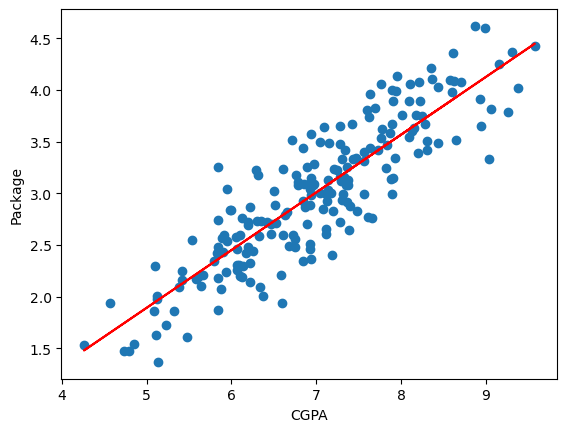

In [16]:
#now see that linear line
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [23]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [25]:
print("MAE",mean_absolute_error(Y_test,y_pred))

MAE 0.2884710931878175


In [26]:

print("MSE",mean_squared_error(Y_test,y_pred))

MSE 0.12129235313495527


In [27]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 0.34827051717731616


In [31]:
print("R-2",r2_score(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)

R-2 0.780730147510384


In [32]:
#Adjust R2
X_test.shape

(40, 1)

In [33]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

# Add random column to check R2 and Adjust R2

In [34]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.913861,3.26
1,5.12,0.751842,1.98
2,7.82,0.961409,3.25
3,7.42,0.198719,3.67
4,6.94,0.143506,3.57


Text(0, 0.5, 'Package(in lpa)')

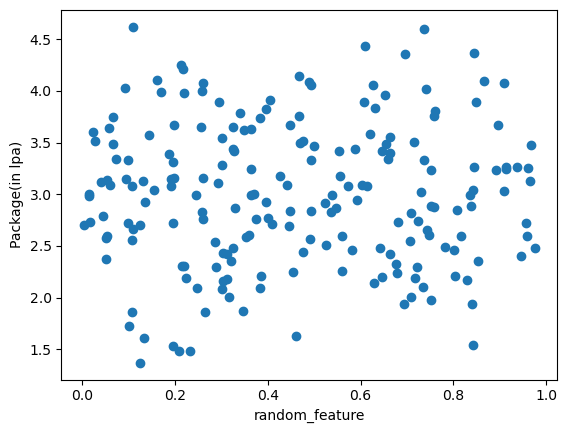

In [36]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [38]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test)

In [44]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred) #same

R2 score 0.7791387744799352


In [46]:
1 - ((1-r2)*(40-1)/(40-1-2)) #reduced

0.767200329857229

In [47]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [48]:
new_df2.sample(5)

,cgpa,iq,package
146,6.07,1.86,2.46
166,8.60,2.98,3.98
92,7.90,2.80,4.00
36,5.99,2.94,2.84
31,8.10,2.79,3.89


Text(0, 0.5, 'Package(in lpa)')

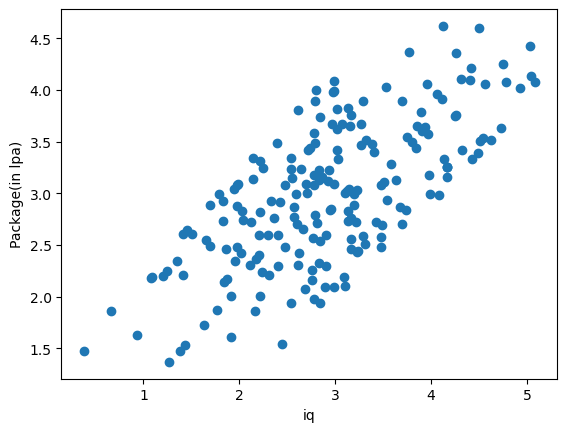

In [49]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [50]:
np.random.randint(-100,100)

-17

In [51]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [56]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred) #increased iq matters

R2 score 0.8095551506155558


In [57]:
1 - ((1-r2)*(40-1)/(40-1-2)) #increased iq matters

0.7992608344326129